<a href="https://colab.research.google.com/github/a1kayda/RF_fingerprinting/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import libs #




In [1]:
import pandas as pd
import numpy as np
import scipy.io
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from incremental_dbscan import IncrementalDBSCAN

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

# Data preprocessing #


In [3]:
dict = scipy.io.loadmat("cpsd_ch1.mat")
X = dict['X'] # Признаки
y = dict['Y'] # Индекс устройства

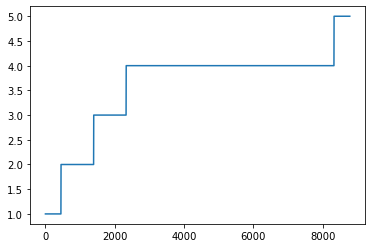

In [4]:
plt.plot(y)

In [5]:
# # colnames = ["S_Mean", "S_Max-Min", "S_Max-|Min|", "S_sumYup - sumYdn", "S_(Max-Mean)/(Mean-Min))", "S_numYup - numYdn", 
# #             "S_maxBd", "S_RangeJDy", "S_F", 
# #             "L_Mean", "L_Max-Min", "L_Max-|Min|", "L_sumYup - sumYdn", "L_(Max-Mean)/(Mean-Min))", "L_numYup - numYdn", 
# #             "L_maxBd", "L_RangeJDy", "L_F", "L_Ph",
# #             "y"]

# phase_colnames = []
# abs_colnames = []
# imag_colnames = []
# real_colnames = []
# for f_name in colnames:
#     phase_colnames.append(f_name + "_phase")
#     abs_colnames.append(f_name + "_abs")
#     real_colnames.append(f_name + "_real")
#     imag_colnames.append(f_name + "_imag")

# #data_abs = pd.read_csv('/content/drive/MyDrive/Alkayda/Multipath_dataset_ABS_no_CFO_comp.txt', sep=",", names=abs_colnames, header=None)
# #data_angle = pd.read_csv('/content/drive/MyDrive/Alkayda/Multipath_dataset_PHASE_no_CFO_comp.txt', sep=",", names=phase_colnames, header=None)
# data_abs = pd.read_csv('Multipath_dataset_ABS_no_CFO_comp.txt', sep=",", names=abs_colnames, header=None)
# data_angle = pd.read_csv('Multipath_dataset_PHASE_no_CFO_comp.txt', sep=",", names=phase_colnames, header=None)

# data_abs.reset_index(drop=True, inplace=True)
# data_abs.drop("y_abs", axis=1, inplace=True)
# data_angle.reset_index(drop=True, inplace=True)

# data = pd.concat([data_abs, data_angle], axis=1)

# data_X = data.drop("y_phase", axis=1).replace([np.inf, -np.inf, np.nan], 0)
# data_y = data["y_phase"]
# data_y = data_y.values-2
# data = data.replace([np.inf, -np.inf, np.nan], 0)

# #data.reset_index()data_y = 

# data_y.shape

In [6]:
X = np.array(X*(y<10))
y = np.array(y*(y<10)).reshape((y.shape[0],))

In [7]:
np.unique(y)

array([1, 2, 3, 4, 5], dtype=uint8)

In [8]:
# X = np.array(X)
# y = np.array(y).reshape((y.shape[0],))

In [9]:
# X_pca = PCA(n_components=2).fit_transform(X)
# plt.scatter(X_pca[:, 0], X_pca[:, 1], c = y, cmap='autumn')

In [10]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X)
X = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 55,
                                                        test_size = 0.3, shuffle=True, stratify=y)
np.unique(y_train)

array([1, 2, 3, 4, 5], dtype=uint8)

# DT + RF + feature importances #


In [11]:
DT = DecisionTreeClassifier(random_state=60)
DT.fit(X_train, y_train)

y_pred = DT.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(np.unique(y_pred)," acc:", acc)

[1 2 3 4 5]  acc: 0.8075901328273245


In [12]:
f1 = []
y_test_1 = y_test
y_pred = y_pred
for i in np.arange(1,6):
    print(i, f1_score((y_test_1*(y_test_1==i)/i), (y_pred*(y_pred==i))/i))


1 0.3550724637681159
2 0.8185053380782918
3 0.5687732342007435
4 0.9086378737541528
5 0.39007092198581567


In [13]:
rf = RandomForestClassifier(n_estimators=300, criterion= "entropy", random_state=29)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(acc)

0.8800759013282733


In [14]:
y_test_1 = y_test
y_pred = y_pred
for i in np.arange(1,6):
    print(i, f1_score((y_test_1*(y_test_1==i)/i), (y_pred*(y_pred==i))/i))

1 0.5628140703517588
2 0.8788426763110307
3 0.700990099009901
4 0.942849618119568
5 0.4907407407407407


In [15]:
# plt.figure(figsize=(23,8))
# f = pd.DataFrame({'features':X.columns, 'importances':rf.feature_importances_}).sort_values('importances').to_numpy()
# plt.bar(f[:,0], f[:,1])
# plt.xticks(rotation=50)
# plt.show

In [16]:
# th = np.arange(0.02,0.05,0.005)
# features = [data_X.columns[rf.feature_importances_ > i] for i in th]
# n_features = [np.size(i) for i in features]

In [17]:
# data_X[data_X.columns[rf.feature_importances_ > 0.03]]

In [18]:
# rf_1 = RandomForestClassifier(n_estimators=300, criterion= "entropy")
# acc = []
# c=0
# plt.figure(figsize=(15,8))
# for i in th:
#     c+=1
#     X_i = data_X[features[int(np.where(abs(th - i) < 0.00001)[0])]]
#     scaler.fit(X_i)
#     X_train, X_test, y_train, y_test = train_test_split(X_i, y,random_state = 55, test_size = 0.3, shuffle=True, stratify=y)
#     rf_1.fit(X_train, y_train)
#     y_pred = rf_1.predict(X_test)
#     acc.append(accuracy_score(y_test, y_pred))
#     a = pd.DataFrame({'features':rf_1.feature_names_in_, 'importances':rf_1.feature_importances_}).sort_values('importances').to_numpy()
#     plt.subplot(2, 3, c)
#     plt.bar(a[:,0], a[:,1], tick_label=[None]*len(a[:,0]))
#     plt.title(str(a.shape[0]) + " features")
# plt.show

In [19]:
# plt.figure(figsize=(15,5))

# plt.subplot(131)
# plt.title("n_features from threshshold")
# plt.plot(th, n_features)
# plt.grid(True)

# plt.subplot(132)
# plt.title("n_features from accuracy")
# plt.plot(acc, n_features)
# plt.grid(True)

# plt.subplot(133)
# plt.title("accuracy from threshshold")
# plt.plot(th, acc)
# plt.grid(True)

In [20]:
# TH = 0.03

In [21]:
# ncol = data_X.columns[rf.feature_importances_ > TH]
# ncol

In [22]:
# X = data_X[data_X.columns[rf.feature_importances_ > TH]]
# scaler.fit(X)
# X = pd.DataFrame(scaler.transform(X), columns=ncol)
# X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 55,
#                                                         test_size = 0.3, shuffle=True, stratify=y)

In [23]:
# rf_2 = RandomForestClassifier(n_estimators=300, criterion= "entropy", random_state=29)
# rf_2.fit(X_train, y_train)

# y_pred = rf_2.predict(X_test)
# acc = accuracy_score(y_test, y_pred)
# print(acc)

In [24]:
# y_test_1 = y_test+1
# y_pred = y_pred+1
# for i in np.arange(1,6):
#     print(i, f1_score((y_test_1*(y_test_1==i)/i), (y_pred*(y_pred==i))/i))

In [25]:
# rf_2.feature_names_in_

In [26]:
# a = pd.DataFrame({'features':rf_2.feature_names_in_, 'importances':rf_2.feature_importances_}).sort_values('importances').to_numpy()

# plt.figure(figsize=(23,8))
# plt.bar(a[:,0], a[:,1])
# plt.xticks(rotation=50)
# plt.show

In [27]:
# rf_2.feature_importances_

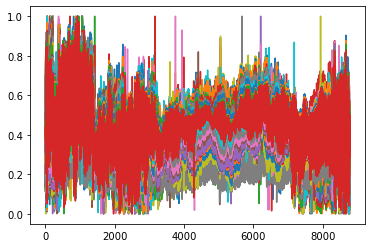

In [28]:
T = TSNE(n_components=2, learning_rate='auto', init='random')
X_tsne=T.fit_transform(X_train)

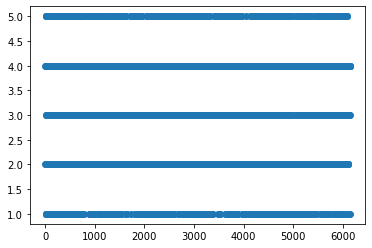

In [29]:
plt.scatter(np.arange(y_train.shape[0]),y_train)

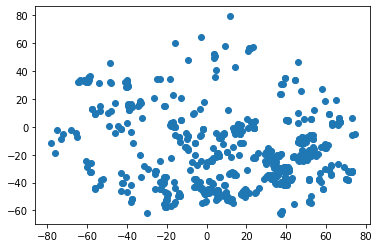

In [43]:
plt.scatter(X_tsne[y_train==3,0], X_tsne[y_train==3,1])

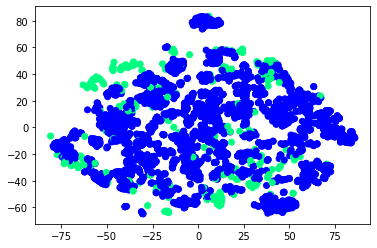

In [49]:
plt.scatter(X_tsne[y_train>=4, 0], X_tsne[y_train>=4, 1], c=y_train[y_train>=4], cmap='winter')

In [32]:
X_train[y_train<30].shape

(6147, 64)

In [33]:
np.unique(y)

array([1, 2, 3, 4, 5], dtype=uint8)

In [34]:
rf_3 = RandomForestClassifier(n_estimators=300, criterion= "entropy", random_state=29)
rf_3.fit(X_train, y_train)

y_pred = rf_3.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("acc ", acc)
for i in np.arange(1,6):
    print("i ",i,"f1 ", f1_score((y_test_1*(y_test_1==i)/i), (y_pred*(y_pred==i))/i))

acc  0.8800759013282733
i  1 f1  0.5628140703517588
i  2 f1  0.8788426763110307
i  3 f1  0.700990099009901
i  4 f1  0.942849618119568
i  5 f1  0.4907407407407407


In [35]:
n = 0
e = 0
ii=0
for i in np.arange(0.13534438,0.13534439,0.000000001):    
    clustering = DBSCAN(eps=i, n_jobs=-1)
    prediction = clustering.fit_predict(X_train)
    pred = prediction[np.argwhere(y_train == 1)]
    n = len(np.unique(clustering.labels_))
    print(n,i)
    if (n > 5):
        e=ii
        print(n,i)
        break
    ii = i

5 0.13534438
6 0.13534438099999999
6 0.13534438099999999


In [36]:
clustering = DBSCAN(eps=e, n_jobs=-1)
prediction = clustering.fit_predict(X_train)
pred = prediction[np.argwhere(y_train == 1)]
print(np.unique(clustering.labels_))

[-1  0  1  2  3]


In [37]:
100*sum(clustering.labels_==y_train)/len(y_train)

0.0

In [38]:
len(y_train)

6147

In [39]:
for i in np.arange(-1, 10, 1):
    print(i, sum(clustering.labels_==i), sum(y_train==i))

-1 6126 0
0 5 0
1 6 313
2 5 660
3 5 656
4 0 4198
5 0 320
6 0 0
7 0 0
8 0 0
9 0 0


NameError: name 'X_embedded' is not defined

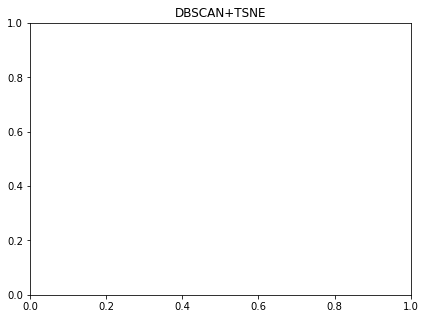

In [40]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title("DBSCAN+TSNE")
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clustering.labels_)
plt.subplot(122)
plt.title("TSNE+TARGET")
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y_train)

In [ ]:
n = 0
e = 0
ii=0
for i in np.arange(0.34,0.36,0.001):    
    clustering_2 = DBSCAN(eps=i, n_jobs=-1)
    prediction = clustering_2.fit_predict(X_embedded)
    pred = prediction[np.argwhere(y_train == 1)]
    n = len(np.unique(clustering_2.labels_))
    if (n > 9):
        e=ii
        print(n,ii)
        break
    ii = i

In [ ]:
# clustering_2 = DBSCAN(eps=0.6, n_jobs=-1)
# prediction = clustering_2.fit_predict(X_embedded)
# pred = prediction[np.argwhere(y_train == 1)]
# n = len(np.unique(clustering_2.labels_))
# n

In [ ]:
# clustering_2 = DBSCAN(eps=e, n_jobs=-1)
# prediction = clustering_2.fit_predict(X_embedded)
# pred = prediction[np.argwhere(y_train == 1)]
# print(np.unique(clustering_2.labels_))

# 100*sum(clustering_2.labels_==y_train)/len(y_train)

# for i in np.arange(-1, 10, 1):
#     print(i, sum(clustering_2.labels_==i), sum(y_train==i))
# plt.figure(figsize=(15,5))
# for i in range(10):
    
# plt.subplot(121)
# plt.title("DBSCAN+TSNE")
# plt.scatter(X_embedded[:, 0], X_embedded[:, 1])
# plt.subplot(122)
# plt.title("TSNE+TARGET")
# plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y_train)

In [ ]:
idbsc = IncrementalDBSCAN()

In [ ]:
help(IncrementalDBSCAN)